# 프로젝트 2
## : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

### (1) 데이터 가져오기

In [1]:
import pandas as pd

# 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
train = pd.read_csv("../data/data/bike-sharing-demand/train.csv")

In [2]:
# train 데이터 확인
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# train 데이터 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
: to_datetime 활용

In [4]:
# datetime 컬럼을 datetime 자료형으로 변환
train['datetime'] = pd.to_datetime(train['datetime'])

In [5]:
# 변경 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
# 연, 월, 일, 시, 분, 초까지 6가지 컬럼
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [7]:
# 생성 확인
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

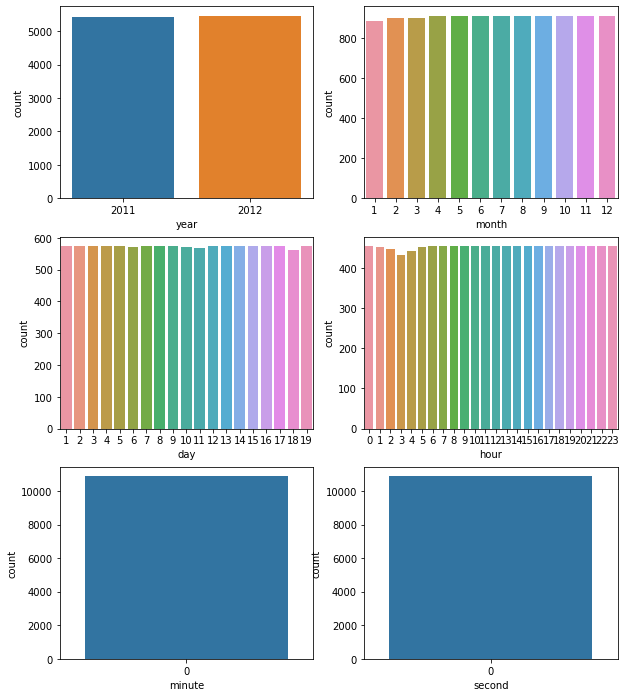

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.countplot 활용해서 시각화하기, subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기
# year와 count
fig = plt.figure(figsize=[10,12])
ax1 = fig.add_subplot(3,2,1)
ax1 = sns.countplot(x='year', data=train)

# month와 count
ax2 = fig.add_subplot(3,2,2)
ax2 = sns.countplot(x='month', data=train)

# day와 count
ax3 = fig.add_subplot(3,2,3)
ax3 = sns.countplot(x='day', data=train)

# hour와 count
ax4 = fig.add_subplot(3,2,4)
ax4 = sns.countplot(x='hour', data=train)

# minute와 count
ax5 = fig.add_subplot(3,2,5)
ax5 = sns.countplot(x='minute', data=train)

# second와 count
ax6 = fig.add_subplot(3,2,6)
ax6 = sns.countplot(x='second', data=train)

### (4) X, y 컬럼 선택 및 train/test 데이터 분리
: X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다.\
ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?


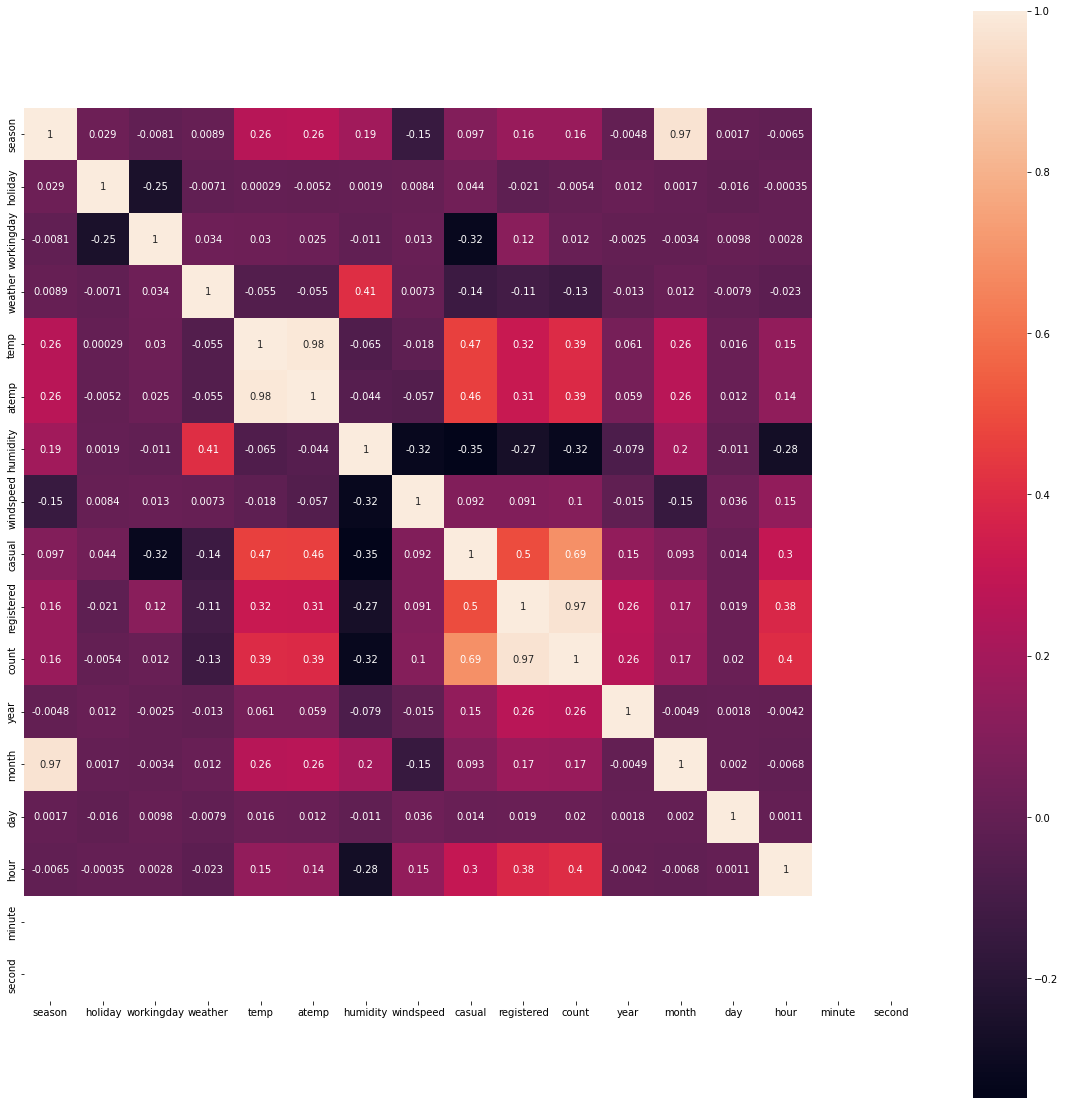

In [9]:
# 다중공산성 확인을 위해 상관계수 확인
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.corr(),annot=True,square=True)

- atemp, temp 사이 다중공산성있을 가능성이 있으므로, temp만 사용
- season, month 사이 다중공산성있을 가능성이 있으므로, month만 사용
- windspeed는 결측값이 많았으므로 제거
- minute, second는 의미없는 컬럼이므로 제거
- registered와 casual은 y와 관련된 컬럼이므로 제거
- count와 상관이 낮은 컬럼은 후에 성능을 보고 고려할 여지 있음

특성 벡터로 사용할 컬럼 : 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'year', 'month', 'day', 'hour'\
라벨 : 'count'

In [10]:
X = train[['holiday', 'workingday', 'weather', 'temp', 'humidity', 'year', 'month', 'day', 'hour']]
# count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기
y = train['count']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(7620, 9) (3266, 9)
(7620,) (3266,)


### (5) LinearRegression 모델 학습

In [13]:
from sklearn.linear_model import LinearRegression

#sklearn의 LinearRegression 모델 불러오기 및 학습하기
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [14]:
#학습된 모델에 X_test를 입력해서 예측값 출력하기
y_pred = model.predict(X_test)
y_pred

array([352.19849006, 351.1918875 , 245.84853577, ..., 250.68907602,
       237.57932241,  78.54475986])

In [15]:
# 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
from sklearn.metrics import mean_absolute_error
import numpy as np

# mse 값과 함께 rmse 값도 계산하기
mse = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_absolute_error(y_test, y_pred))

# 출력
print("mse = ", mse)
print("rmse = ", rmse)

mse =  106.25146528875406
rmse =  10.307835140743864


### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

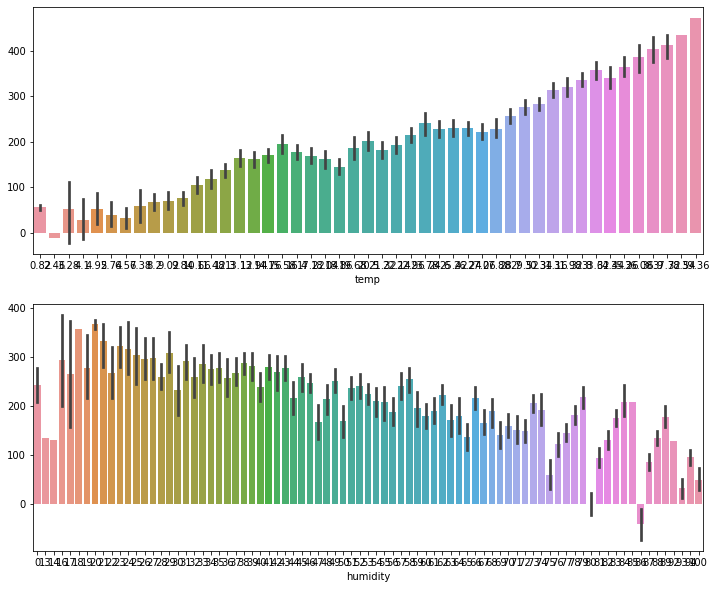

In [16]:
import seaborn as sns

fig = plt.figure(figsize=[12,10])
# X: temp, y: count
ax01 = fig.add_subplot(2,1,1)
ax01 = sns.barplot(x=X_test['temp'], y=y_pred)
# X: humidity, y: count
ax02 = fig.add_subplot(2,1,2)
ax02 = sns.barplot(x=X_test['humidity'], y=y_pred)